In [42]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from database import DentistsCareer, Base

In [43]:
# Create an engine that stores data in the local directory's dentists.db file
engine = create_engine('sqlite:///dentists.db')
Base.metadata.bind = engine
DBSession = sessionmaker(bind=engine)
session = DBSession()

In [44]:
dentist_careers = []
dental_frame = session.query(DentistsCareer).all()
for item in dental_frame:
    dentist_careers.append(
        { 'career': str(item.dentist_alt_career).title()}
    )
df = pd.DataFrame(dentist_careers)

In [45]:
df.head()

,career
0,Head Coach
1,American Football Player
2,Songwriter
3,Artist
4,Caricaturist


In [56]:
x = df['career'].value_counts()
x.head(20)

Politician                     130
American Football Player        15
Physician                       14
Surgeon                         12
Writer                           9
Athletics Competitor             9
Military Personnel               8
Military Officer                 8
Actor                            8
Baseball Player                  7
University Teacher               7
Cricketer                        7
Australian Rules Footballer      6
Basketball Player                6
Painter                          5
Novelist                         5
Model                            5
Songwriter                       5
Association Football Player      4
Lawyer                           4
Name: career, dtype: int64

Text(0,0.5,'Dentist count')

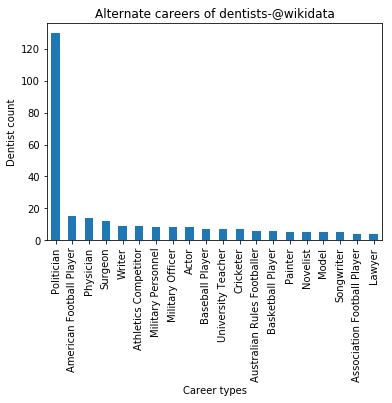

In [66]:
ax = x.head(20).plot.bar(legend=False,title='Alternate careers of dentists-@wikidata')
ax.set_xlabel("Career types")
ax.set_ylabel("Dentist count")

In [63]:
fig = ax.get_figure()
fig.savefig('images/dentists/dentist_careers.png',bbox_inches='tight')